# [Energy Demand Forecasting Kaggle Competition](https://www.kaggle.com/c/energy-demand-forecasting/overview)

"The purpose of this competition is to create an energy demand forecast competition, where students can forecast energy demand over a given time horizon, given some historic data. The forecast methodology is open to the student's choice, and can range from time series analysis methods to machine learning models - as discussed in lecture 3 of the [course](https://sea.innoenergy.com/course/data-science-energy-engineers-case-demand-side-management/info)."

"The training dataset consists of aggregated electricity demand from a number of buildings. The forecasting task is to create a forecast that minimises the MAE for the defined time horizon."



In this notebook, I visualize the data and try different algorithms and approaches for time series forecasting. 

Let's start by reading and inspecting the data!

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

In [465]:
train = pd.read_csv('train.csv', index_col='Index', parse_dates=True)

In [466]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8064 entries, 2013-01-01 00:00:00 to 2013-03-25 23:45:00
Data columns (total 1 columns):
Load    8064 non-null float64
dtypes: float64(1)
memory usage: 126.0 KB


In [467]:
train.head()

,Load
Index,
2013-01-01 00:00:00,714.6
2013-01-01 00:15:00,784.7
2013-01-01 00:30:00,644.0
2013-01-01 00:45:00,631.9
2013-01-01 01:00:00,591.1


In [468]:
train.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 00:15:00',
               '2013-01-01 00:30:00', '2013-01-01 00:45:00',
               '2013-01-01 01:00:00', '2013-01-01 01:15:00',
               '2013-01-01 01:30:00', '2013-01-01 01:45:00',
               '2013-01-01 02:00:00', '2013-01-01 02:15:00',
               ...
               '2013-03-25 21:30:00', '2013-03-25 21:45:00',
               '2013-03-25 22:00:00', '2013-03-25 22:15:00',
               '2013-03-25 22:30:00', '2013-03-25 22:45:00',
               '2013-03-25 23:00:00', '2013-03-25 23:15:00',
               '2013-03-25 23:30:00', '2013-03-25 23:45:00'],
              dtype='datetime64[ns]', name='Index', length=8064, freq=None)

In [469]:
train.index.freq = '15T'

In [470]:
train.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 00:15:00',
               '2013-01-01 00:30:00', '2013-01-01 00:45:00',
               '2013-01-01 01:00:00', '2013-01-01 01:15:00',
               '2013-01-01 01:30:00', '2013-01-01 01:45:00',
               '2013-01-01 02:00:00', '2013-01-01 02:15:00',
               ...
               '2013-03-25 21:30:00', '2013-03-25 21:45:00',
               '2013-03-25 22:00:00', '2013-03-25 22:15:00',
               '2013-03-25 22:30:00', '2013-03-25 22:45:00',
               '2013-03-25 23:00:00', '2013-03-25 23:15:00',
               '2013-03-25 23:30:00', '2013-03-25 23:45:00'],
              dtype='datetime64[ns]', name='Index', length=8064, freq='15T')

In [104]:
train.isna().sum()

Load    0
dtype: int64

In [105]:
train.isnull().sum()

Load    0
dtype: int64

[Text(0, 0.5, 'Load'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Full training data')]

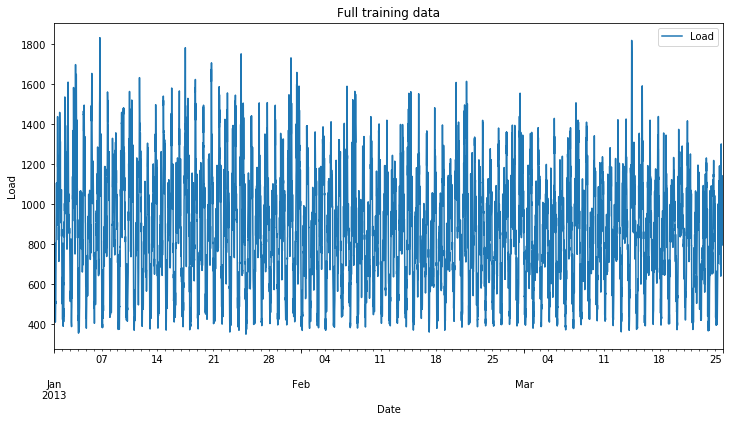

In [73]:
ax = train.plot(figsize=(12,6))
ax.autoscale(axis='x', tight = True)
ax.set(xlabel='Date', ylabel='Load', title='Full training data')

[Text(0, 0.5, 'Load'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'First 14 days of data')]

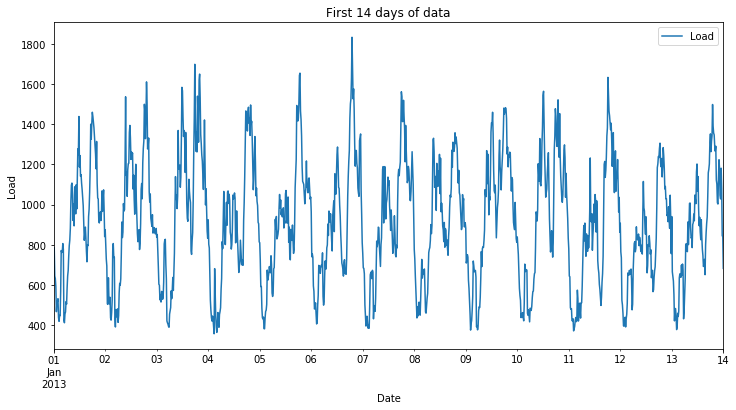

In [74]:
ax = train['2013-01-01 00:00:00':'2013-01-14 00:00:00'].plot()
ax.autoscale(axis='x', tight = True)
ax.set(xlabel='Date', ylabel='Load', title='First 14 days of data')

## [ETS decomposition](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)

The time series can be decomposed into Error, Trend and Seasonality to get a better understanding of the data.

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
result = seasonal_decompose(train['Load'], freq = ((24*60)//15))

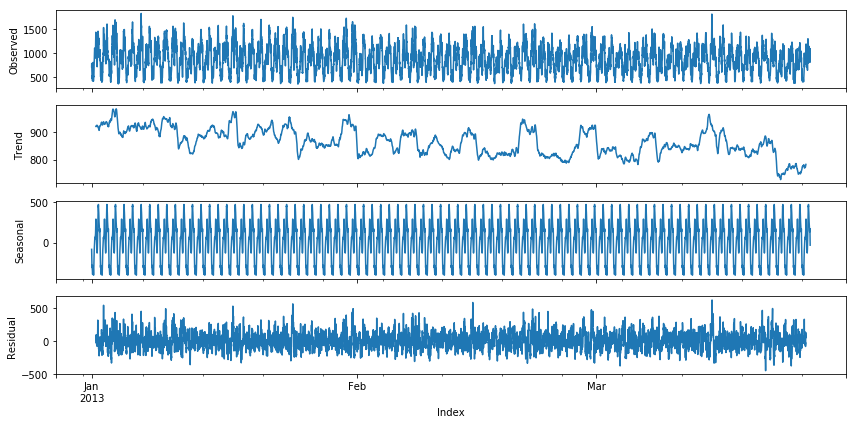

In [77]:
result.plot();

The plot above shows a clear seasonality that repeats every day, a considerable residual and no clear trend.

## [Forecasting with Holt-Winters Exponential Smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)

The Holt-Winters (Triple Exponential Smoothing) is an Exponential Weighted Moving Average that assigns more weight to the more recent values. Triple refers to the three components of the model: level, trend and seasonality.

In [14]:
train_data = train.iloc[:-(4*24*7)]

In [15]:
eval_data = train.iloc[-(4*24*7):]

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
from sklearn.metrics import mean_absolute_error

In [22]:
fitted_model = ExponentialSmoothing(train_data['Load'], trend=None, seasonal='add', seasonal_periods=(4*24)).fit()

In [23]:
test_predictions = fitted_model.forecast(4*24*7)

In [24]:
# The predictions are also every 15 minutes
test_predictions

2013-03-19 00:00:00     802.366769
2013-03-19 00:15:00     765.848107
2013-03-19 00:30:00     712.238687
2013-03-19 00:45:00     616.736280
2013-03-19 01:00:00     622.697881
2013-03-19 01:15:00     723.432064
2013-03-19 01:30:00     662.647125
2013-03-19 01:45:00     618.483163
2013-03-19 02:00:00     576.448977
2013-03-19 02:15:00     526.368191
2013-03-19 02:30:00     475.862571
2013-03-19 02:45:00     389.680028
2013-03-19 03:00:00     412.365194
2013-03-19 03:15:00     421.519271
2013-03-19 03:30:00     440.648100
2013-03-19 03:45:00     473.681021
2013-03-19 04:00:00     528.519014
2013-03-19 04:15:00     564.463330
2013-03-19 04:30:00     610.992743
2013-03-19 04:45:00     630.773512
2013-03-19 05:00:00     638.616868
2013-03-19 05:15:00     628.603238
2013-03-19 05:30:00     618.615384
2013-03-19 05:45:00     609.316386
2013-03-19 06:00:00     645.602470
2013-03-19 06:15:00     691.273293
2013-03-19 06:30:00     765.838633
2013-03-19 06:45:00     771.734438
2013-03-19 07:00:00 

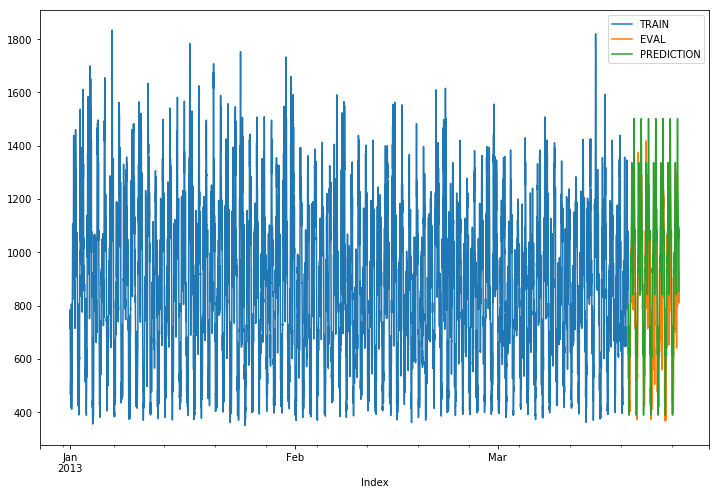

In [25]:
train_data['Load'].plot(legend=True, label='TRAIN', figsize=(12,8))
eval_data['Load'].plot(legend=True, label='EVAL')
test_predictions.plot(legend=True, label='PREDICTION')

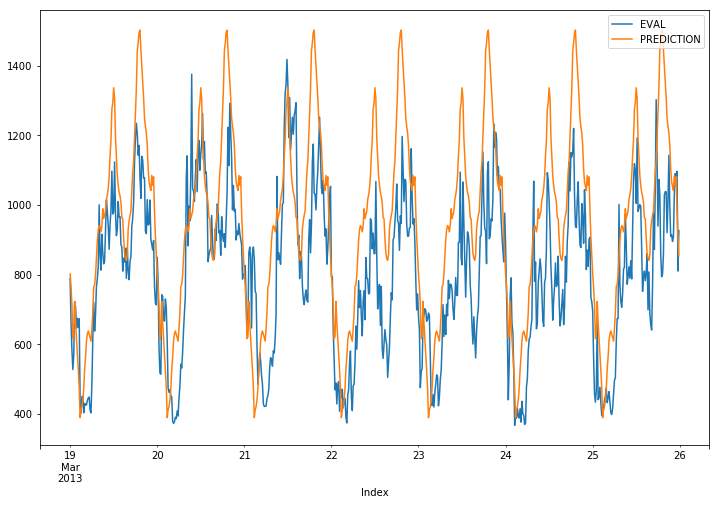

In [26]:
eval_data['Load'].plot(legend=True, label='EVAL', figsize=(12,8))
test_predictions.plot(legend=True, label='PREDICTION')

In [27]:
mean_absolute_error(eval_data, test_predictions)

180.94748923527123

In [28]:
es_model = ExponentialSmoothing(train['Load'], trend=None, seasonal='add', seasonal_periods=(4*24)).fit()

In [29]:
es_forecast_predictions = es_model.forecast(4*24*7)

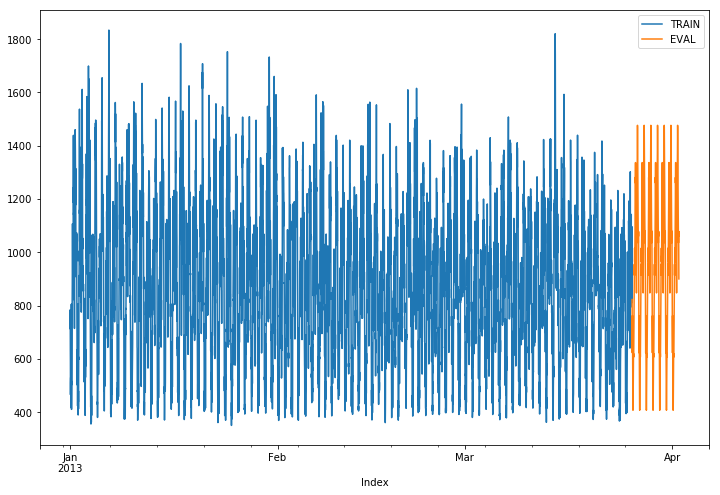

In [30]:
train['Load'].plot(legend=True, label='TRAIN', figsize=(12,8))
es_forecast_predictions.plot(legend=True, label='EVAL')

# Forecasting with a [SARIMA](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/) model 

### [Autocorrelation and Partial Autocorrelation](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

In [31]:
from statsmodels.tsa.statespace.tools import diff

In [32]:
import statsmodels.api as sm

In [33]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [34]:
from pandas.plotting import lag_plot

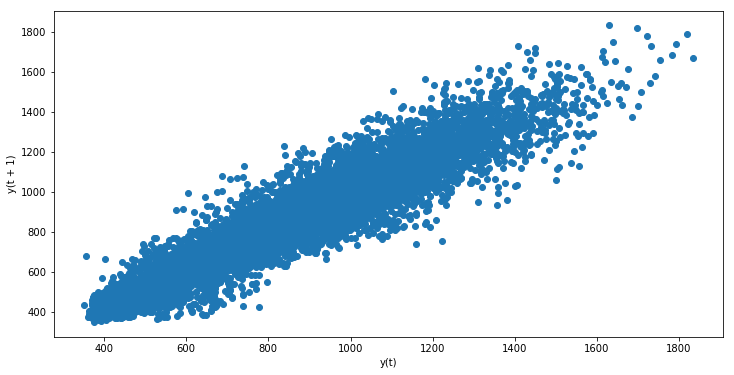

In [35]:
lag_plot(train['Load'])

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

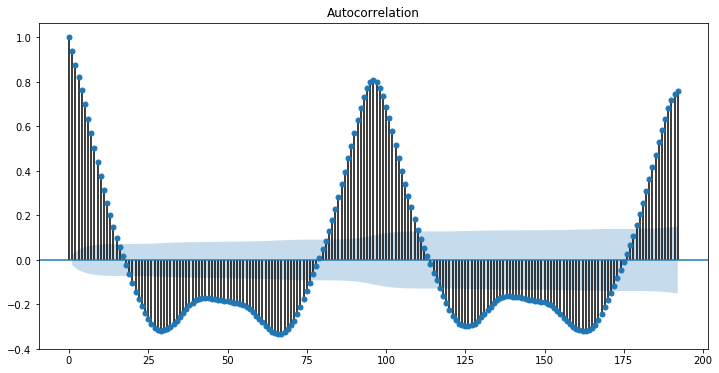

In [37]:
plot_acf(train, lags=(4*24*2));

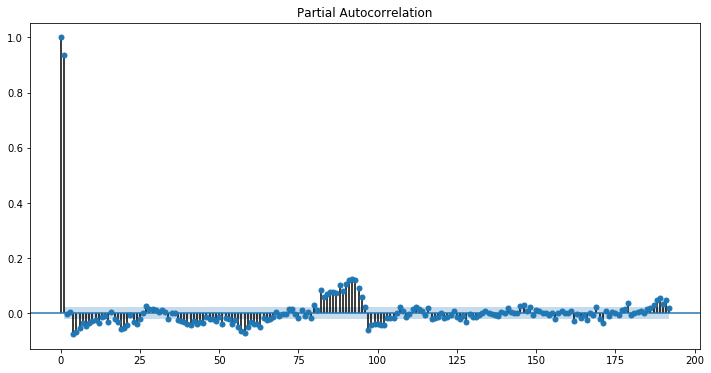

In [38]:
plot_pacf(train, lags=(4*24*2));

Let's now perform an [Augmented Dicky-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) test to check if the data is stationary.

In [88]:
from statsmodels.tsa.stattools import adfuller

In [91]:
adftest = adfuller(train['Load'])
adfout = pd.Series(adftest[0:4], index=['ADF Test Statistic', 'p-value', 'Number Lags USed', 'Number Observations'])

In [92]:
for key,val in adftest[4].items():
  adfout[f'critical value ({key})'] = val

In [93]:
adfout

ADF Test Statistic       -18.876310
p-value                    0.000000
Number Lags USed          26.000000
Number Observations     8037.000000
critical value (1%)       -3.431164
critical value (5%)       -2.861900
critical value (10%)      -2.566961
dtype: float64

p-value <= 0.05 --- The null hypothesis is rejected, data is stationary according to the Augmented Dicky Fuller Test. This means that no differencing is needed for the modelling of a SARIMA model (d and D values equal to 0).

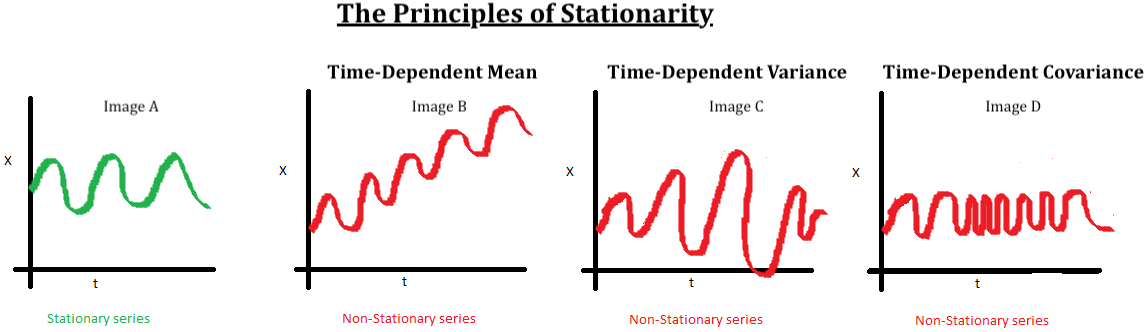


Source: [Beingdatum](https://beingdatum.com/time-series-forecasting/)

### Choosing an ARIMA model

In [94]:
from pmdarima import auto_arima

In [108]:
# For a fast demonstration, let's just find the best model using only the last week of data
train_arima = train[-4*24*7:]
train_arima

,Load
Index,
2013-03-19 00:00:00,788.9
2013-03-19 00:15:00,662.6
2013-03-19 00:30:00,582.2
2013-03-19 00:45:00,527.8
2013-03-19 01:00:00,570.2
2013-03-19 01:15:00,721.8
2013-03-19 01:30:00,707.5
2013-03-19 01:45:00,646.4
2013-03-19 02:00:00,675.0


### The auto_arima function fits different order models to the data and estimates the quality of the model using the [Akaike Information Criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) and the [Bayseian Information Criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

In [109]:
stepwise_fit = auto_arima(train_arima, start_p=0, start_q=0, max_p=4, max_q=4, seasonal=True, trace=True, m=96)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 96); AIC=8935.317, BIC=8953.358, Fit time=26.785 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 96); AIC=9233.046, BIC=9242.066, Fit time=0.014 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 96); AIC=7978.781, BIC=7996.822, Fit time=23.283 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 96); AIC=8494.381, BIC=8512.422, Fit time=15.737 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 96); AIC=7991.388, BIC=8004.919, Fit time=0.046 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 96); AIC=7965.347, BIC=7987.899, Fit time=136.876 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 96); AIC=7958.589, BIC=7985.650, Fit time=194.422 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 1, 96); AIC=8865.830, BIC=8888.381, Fit time=163.514 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 1, 96); AIC=7965.681, BIC=7997.253, Fit time=232.184 seconds
Fit ARIMA: order=

### As it can be seen above, the best performing model is the one with order=(1,0,0) and seasonal order=(2,0,1,96). After evaluating this model, the auto_arima function continues fitting a few models but stops before getting to p and q values equal to 4 since it sees no improvement in performance.

In [110]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  672
Model:             SARIMAX(1, 0, 0)x(2, 0, 1, 96)   Log Likelihood               -3973.294
Date:                            Tue, 15 Sep 2020   AIC                           7958.589
Time:                                    18:36:01   BIC                           7985.650
Sample:                                         0   HQIC                          7969.069
                                            - 672                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.4167     12.893      1.661      0.097      -3.854      46.687
ar.L1          0.8728      0.021     42.496      0.000       0.833       0.913
ar.S.L96       0.7083      0.174      4.065      0.000       0.367       1.050
ar.S.L192      0.0834      0.070      1.199      0.231      -0.053       0.220
ma.S.L96      -0.5771      0.181     -3.189      0.001      -0.932      -0.222
sigma2      7997.1644    388.822     20.568      0.000    7235.088    8759.241
===================================================================================
Ljung-Box (Q):                       36.80   Jarque-Bera (JB):                48.41
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.30
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
train_data = train[:-4*24*7]

In [ ]:
test_data = train[-4*24*7:]

The use of [initialization='approximate diffuse'](https://stackoverflow.com/questions/54136280/sarimax-python-np-linalg-linalg-linalgerror-lu-decomposition-error) is made to avoid a linear algebra error.

In [ ]:
model = SARIMAX(train_data['Load'], order=(1,0,0), seasonal_order=(2,0,1,96), initialization='approximate_diffuse')

In [ ]:
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               Load   No. Observations:                 7392
Model:             SARIMAX(1, 0, 0)x(2, 0, 1, 96)   Log Likelihood              -43897.270
Date:                            Thu, 27 Aug 2020   AIC                          87804.541
Time:                                    17:24:57   BIC                          87839.082
Sample:                                01-01-2013   HQIC                         87816.411
                                     - 03-18-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7560      0.006    118.199      0.000       0.743       0.769
ar.S.L96       1.0016      0.011     92.140      0.000       0.980       1.023
ar.S.L192     -0.0035      0.011     -0.324      0.746      -0.025       0.018
ma.S.L96      -0.9377      0.005   -176.166      0.000      -0.948      -0.927
sigma2      7392.5512     99.473     74.317      0.000    7197.588    7587.515
===================================================================================
Ljung-Box (Q):                      164.94   Jarque-Bera (JB):               596.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.25
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train_data)

In [ ]:
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start, end).rename('SARIMA Predictions')

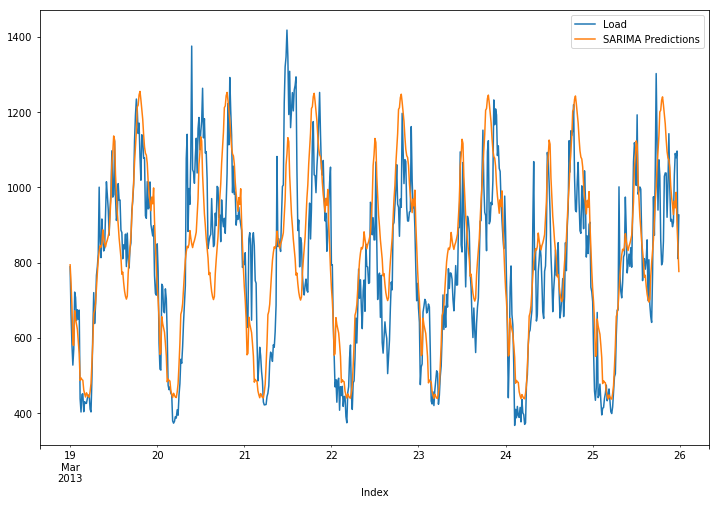

In [ ]:
test_data.plot(legend=True, figsize=(12,8))
predictions.plot(legend=True)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test_data, predictions)

104.24870601851683

### Forecast into the future using the last 4 weeks of data

In [ ]:
model = SARIMAX(train.loc['2013-03-01':]['Load'],order=(1,0,0),seasonal_order=(2,0,1,96), initialization='approximate_diffuse')

In [ ]:
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               Load   No. Observations:                 2400
Model:             SARIMAX(1, 0, 0)x(2, 0, 1, 96)   Log Likelihood              -14478.204
Date:                            Thu, 27 Aug 2020   AIC                          28966.409
Time:                                    21:42:58   BIC                          28995.325
Sample:                                03-01-2013   HQIC                         28976.928
                                     - 03-25-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7758      0.011     71.262      0.000       0.755       0.797
ar.S.L96       0.9946      0.021     48.015      0.000       0.954       1.035
ar.S.L192      0.0011      0.021      0.055      0.956      -0.039       0.041
ma.S.L96      -0.9278      0.021    -45.161      0.000      -0.968      -0.888
sigma2      6803.4463    176.806     38.480      0.000    6456.912    7149.981
===================================================================================
Ljung-Box (Q):                       71.76   Jarque-Bera (JB):               191.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = results.predict(len(train.loc['2013-03-01':]), len(train.loc['2013-03-01':])+671).rename('SARIMA FORECAST')

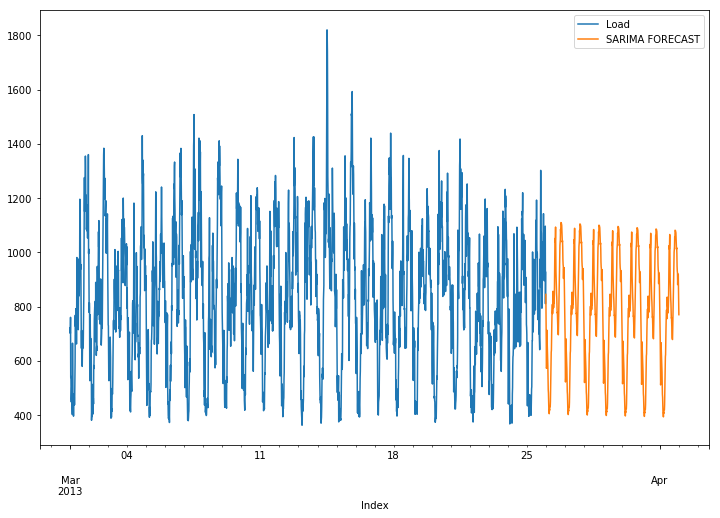

In [ ]:
train.loc['2013-03-01':].plot(legend=True, figsize=(12,8))
forecast.plot(legend=True)

In [ ]:
output = pd.DataFrame(forecast)

In [ ]:
output.index.name = 'Index'

In [ ]:
output = output.rename(columns={'Index':'Index', 'SARIMA FORECAST':'Load'}).reset_index()

In [ ]:
output

,Index,Load
0,2013-03-26 00:00:00,845.004349
1,2013-03-26 00:15:00,774.204447
2,2013-03-26 00:30:00,670.642869
3,2013-03-26 00:45:00,572.704072
4,2013-03-26 01:00:00,577.577870
5,2013-03-26 01:15:00,713.402182
6,2013-03-26 01:30:00,680.064527
7,2013-03-26 01:45:00,659.009496
8,2013-03-26 02:00:00,635.274956
9,2013-03-26 02:15:00,610.048953


In [ ]:
output.to_csv('sarima_subm.csv', index=False)

#### MAE obtained in the leaderboard with this submission is 105.35218

## Using all training data

In [ ]:
model = SARIMAX(train['Load'],order=(1,0,0),seasonal_order=(2,0,1,96), initialization='approximate_diffuse')

In [ ]:
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               Load   No. Observations:                 8064
Model:             SARIMAX(1, 0, 0)x(2, 0, 1, 96)   Log Likelihood              -47829.865
Date:                            Fri, 28 Aug 2020   AIC                          95669.731
Time:                                    00:29:44   BIC                          95704.707
Sample:                                01-01-2013   HQIC                         95681.698
                                     - 03-25-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7580      0.006    124.686      0.000       0.746       0.770
ar.S.L96       1.0032      0.010     95.989      0.000       0.983       1.024
ar.S.L192     -0.0053      0.010     -0.512      0.608      -0.026       0.015
ma.S.L96      -0.9381      0.005   -189.208      0.000      -0.948      -0.928
sigma2      7365.8886     94.715     77.769      0.000    7180.250    7551.527
===================================================================================
Ljung-Box (Q):                      167.80   Jarque-Bera (JB):               646.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.26
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = results.predict(len(train), len(train)+671).rename('SARIMA FORECAST')

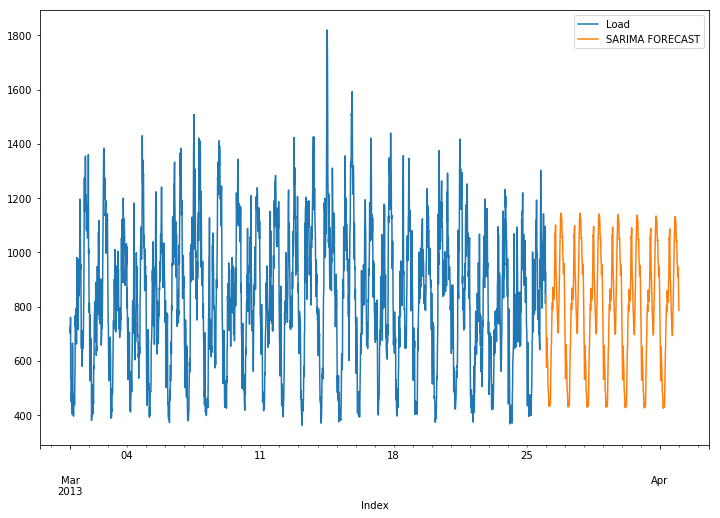

In [ ]:
train.loc['2013-03-01':].plot(legend=True, figsize=(12,8))
forecast.plot(legend=True)

In [ ]:
output = pd.DataFrame(forecast)

In [ ]:
output = output.rename(columns={'Index':'Index', 'SARIMA FORECAST':'Load'}).reset_index()

In [ ]:
output

,index,Load
0,2013-03-26 00:00:00,842.508067
1,2013-03-26 00:15:00,771.184027
2,2013-03-26 00:30:00,674.320023
3,2013-03-26 00:45:00,576.723722
4,2013-03-26 01:00:00,575.515273
5,2013-03-26 01:15:00,685.458352
6,2013-03-26 01:30:00,654.069075
7,2013-03-26 01:45:00,632.047549
8,2013-03-26 02:00:00,613.810843
9,2013-03-26 02:15:00,589.711784


In [ ]:
output.to_csv('sarima_all_data_subm.csv', index=False)

#### MAE obtained in the leaderboard with this submission is 106.10127

# Forecasting with [Facebook Prophet](https://peerj.com/preprints/3190.pdf)

In [11]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [104]:
train_fb = train.reset_index()

In [106]:
train_fb.columns = ['ds', 'y']

In [107]:
train_fb.head()

,ds,y
0,2013-01-01 00:00:00,714.6
1,2013-01-01 00:15:00,784.7
2,2013-01-01 00:30:00,644.0
3,2013-01-01 00:45:00,631.9
4,2013-01-01 01:00:00,591.1


In [108]:
train_data_fb = train_fb[:-672]
eval_data_fb = train_fb[-672:]

In [112]:
model = Prophet()

In [113]:
model.fit(train_data_fb)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [115]:
load_eval_fcst = model.predict(df=eval_data_fb)

In [116]:
load_eval_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-19 00:00:00,864.639060,582.758575,943.701453,864.639060,864.639060,-100.953539,-100.953539,-100.953539,-87.531179,-87.531179,-87.531179,-13.422359,-13.422359,-13.422359,0.0,0.0,0.0,763.685521
1,2013-03-19 00:15:00,864.654545,555.471600,903.900338,864.654545,864.654545,-131.122716,-131.122716,-131.122716,-117.647121,-117.647121,-117.647121,-13.475595,-13.475595,-13.475595,0.0,0.0,0.0,733.531829
2,2013-03-19 00:30:00,864.670030,532.853799,878.083728,864.670030,864.670030,-161.805622,-161.805622,-161.805622,-148.275760,-148.275760,-148.275760,-13.529862,-13.529862,-13.529862,0.0,0.0,0.0,702.864407
3,2013-03-19 00:45:00,864.685515,505.025559,850.048722,864.685515,864.685515,-192.902712,-192.902712,-192.902712,-179.317687,-179.317687,-179.317687,-13.585025,-13.585025,-13.585025,0.0,0.0,0.0,671.782803
4,2013-03-19 01:00:00,864.701000,460.801042,826.772862,864.701000,864.701000,-224.157488,-224.157488,-224.157488,-210.516545,-210.516545,-210.516545,-13.640943,-13.640943,-13.640943,0.0,0.0,0.0,640.543511


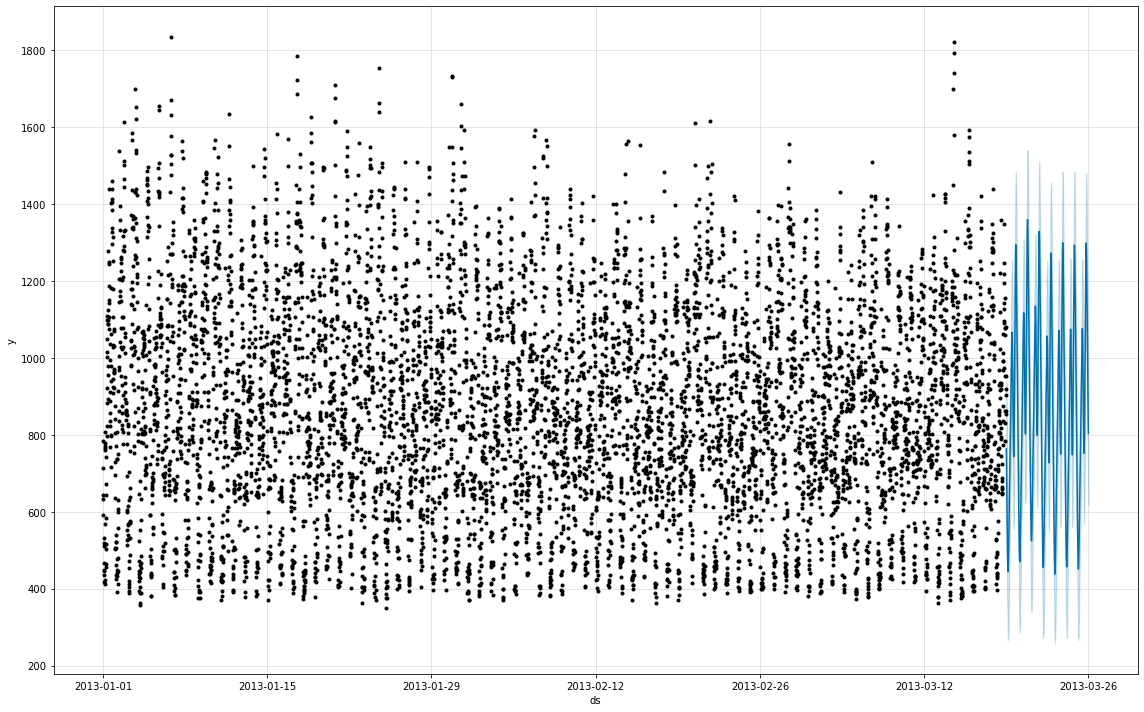

In [85]:
# Plot the forecast on evaluation data
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(16)
fig = model.plot(load_eval_fcst, ax=ax)
plt.show()

The following line of code is just to [solve an error](https://stackoverflow.com/questions/43206554/typeerror-float-argument-must-be-a-string-or-a-number-not-period), it might not be necessary depending on the verstion of pandas

In [92]:
pd.plotting.register_matplotlib_converters()

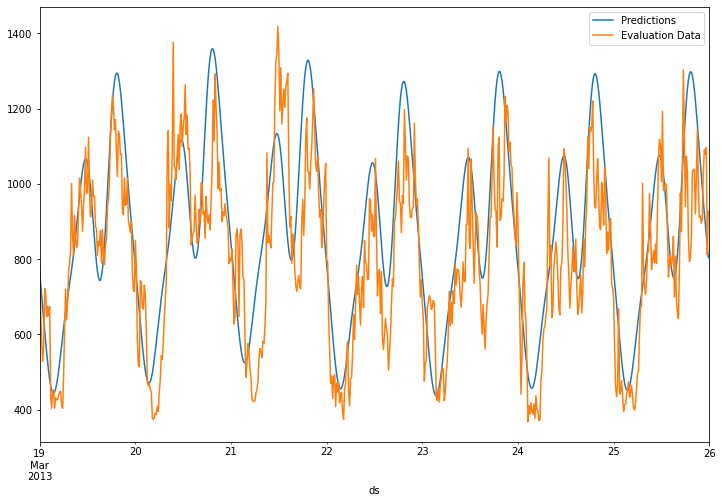

In [120]:
ax = load_eval_fcst.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,8))
eval_data_fb.plot(x='ds', y='y', label='Evaluation Data', legend=True, ax=ax, xlim=('2013-03-19','2013-03-26'))

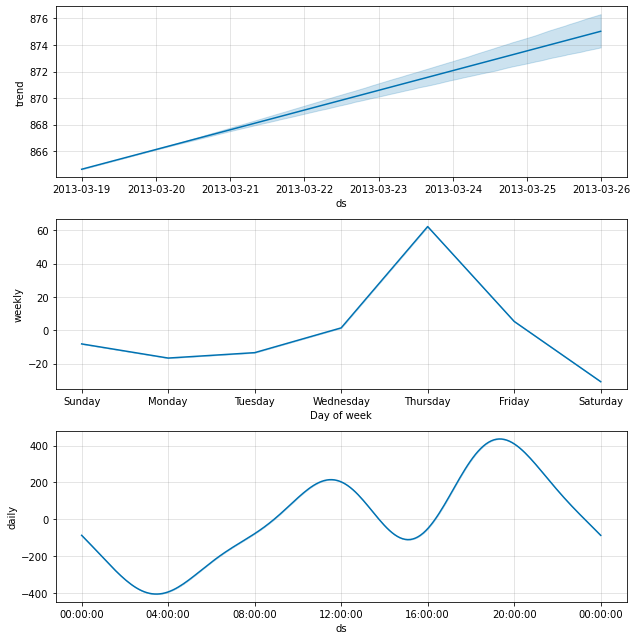

In [20]:
# Plot the components of the model
fig = model.plot_components(load_eval_fcst)

In [121]:
mean_absolute_error(y_true=eval_data_fb['y'], y_pred=load_eval_fcst['yhat'])

127.97772081574684

Now forecasting into the future

In [122]:
model2 = Prophet()

In [123]:
model2.fit(train_fb)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [26]:
future = model2.make_future_dataframe(periods=4*24*7, freq='15min')

In [32]:
future.tail()

,ds
8731,2013-04-01 22:45:00
8732,2013-04-01 23:00:00
8733,2013-04-01 23:15:00
8734,2013-04-01 23:30:00
8735,2013-04-01 23:45:00


In [28]:
forecast = model2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8731,2013-04-01 22:45:00,831.677699,655.021302,1015.417555
8732,2013-04-01 23:00:00,801.943966,613.932330,983.674354
8733,2013-04-01 23:15:00,772.812018,596.079223,964.872439
8734,2013-04-01 23:30:00,743.971230,589.448821,918.722849
8735,2013-04-01 23:45:00,715.109708,543.658505,900.605258


In [31]:
forecast[['ds','yhat']][-4*24*7:].rename(columns={'ds':'Index', 'yhat':'Load'}).to_csv('fbprophet_subm.csv', index=False);

The score on the public leaderboard is 120.05195

# Forecasting using a [Linear Model](https://scikit-learn.org/stable/modules/linear_model.html)

In [662]:
from sklearn.linear_model import LinearRegression

In [663]:
from datetime import datetime

In [664]:
y = np.array(train.reset_index()['Load'])

In [665]:
X = []
window = 672
for idx in range(len(y) - window):
    X.append(y[idx:idx + window])

X = np.array(X)

In [678]:
X

array([[ 714.6,  784.7,  644. , ..., 1186.1, 1101. ,  941.3],
       [ 784.7,  644. ,  631.9, ..., 1101. ,  941.3,  776.3],
       [ 644. ,  631.9,  591.1, ...,  941.3,  776.3,  729.6],
       ...,
       [ 919.1,  903.5,  861.5, ..., 1031.3, 1090.3, 1079. ],
       [ 903.5,  861.5,  788.9, ..., 1090.3, 1079. , 1096.7],
       [ 861.5,  788.9,  662.6, ..., 1079. , 1096.7,  810.6]])

In [667]:
y

array([ 714.6,  784.7,  644. , ..., 1096.7,  810.6,  926.5])

In [668]:
lin_model = LinearRegression()

In [669]:
lin_model.fit(X, y[window:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [670]:
lm_prediction = lin_model.predict(X)

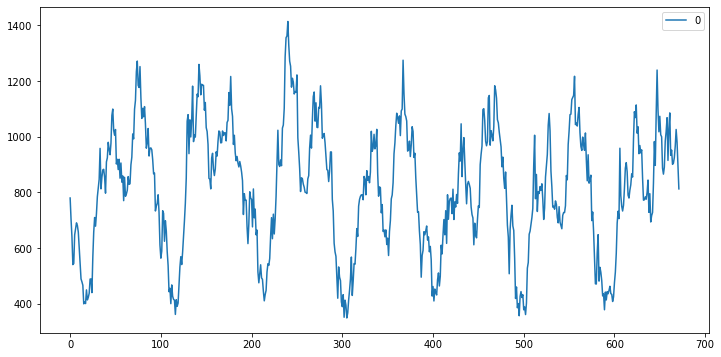

In [671]:
pd.DataFrame(lm_prediction[-672:]).plot()

In [672]:
idx = pd.date_range('2013-03-26', periods=672, freq='15min', name='Index')

In [673]:
lm3_df = pd.DataFrame(lm_prediction[-672:], index=idx, columns=['Load'])

In [674]:
output['Load'] = lm3_df['Load'].values

In [675]:
output

,Index,Load
0,2013-03-26 00:00:00,779.602492
1,2013-03-26 00:15:00,703.345239
2,2013-03-26 00:30:00,639.618227
3,2013-03-26 00:45:00,540.350101
4,2013-03-26 01:00:00,544.322245
5,2013-03-26 01:15:00,647.417187
6,2013-03-26 01:30:00,668.411723
7,2013-03-26 01:45:00,690.369793
8,2013-03-26 02:00:00,680.725280
9,2013-03-26 02:15:00,657.367917


In [659]:
output.to_csv('linear_pred_submission.csv', index=False)

## This submission achieves a 97.75101 score in the private leaderboard and a 104.46741 score in the public one

# Forecasting using [ML algorithms with Time Series Cross Validation and Feature Engineering](https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1)

## Let's use a different approach and engineer some new features!

In [303]:
data_consumption = train

In [304]:
data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'Load'].shift(96)

In [305]:
data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff(96)

In [334]:
data_consumption.head()

,Load,Yesterday,Yesterday_Diff
Index,,,
2013-01-03 00:00:00,837.1,875.4,160.8
2013-01-03 00:15:00,850.9,805.1,20.4
2013-01-03 00:30:00,775.1,728.9,84.9
2013-01-03 00:45:00,693.1,694.6,62.7
2013-01-03 01:00:00,603.4,505.6,-85.5


In [335]:
data_consumption.tail()

,Load,Yesterday,Yesterday_Diff
Index,,,
2013-03-25 22:45:00,1090.3,824.3,-138.8
2013-03-25 23:00:00,1079.0,901.4,-11.7
2013-03-25 23:15:00,1096.7,907.5,37.7
2013-03-25 23:30:00,810.6,734.6,-102.3
2013-03-25 23:45:00,926.5,722.8,-254.1


In [309]:
train['2013-03-24 23:00:00':'2013-03-24 23:45:00']

,Load,Yesterday,Yesterday_Diff
Index,,,
2013-03-24 23:00:00,901.4,913.1,19.8
2013-03-24 23:15:00,907.5,869.8,82.8
2013-03-24 23:30:00,734.6,836.9,138.1
2013-03-24 23:45:00,722.8,976.9,231.9


See that for example, 976.9 - 722.8 = -254.1

In [311]:
data_consumption = data_consumption.dropna()

In [348]:
X_train = data_consumption[:-672].drop(['Load'], axis = 1)
y_train = data_consumption[:-672]['Load']
X_test = data_consumption[-672:].drop(['Load'], axis = 1)
y_test = data_consumption[-672:]['Load']

In [343]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

In [439]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

LR: 0.698145 (0.036305)
NN: 0.686154 (0.042844)
KNN: 0.651981 (0.047795)
RF: 0.625173 (0.053260)
Ada: 0.685834 (0.031259)


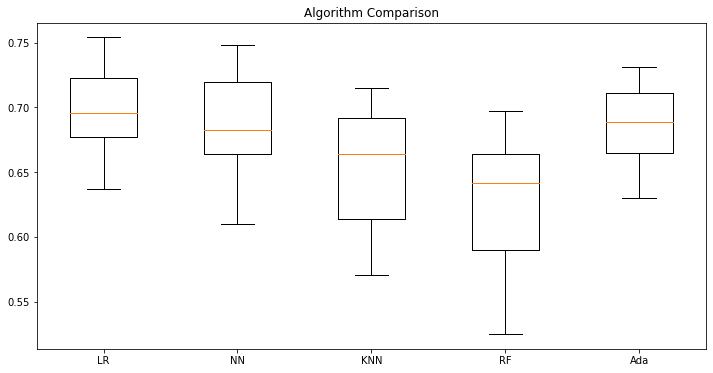

In [440]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10)))
models.append(('Ada', AdaBoostRegressor()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
 tscv = TimeSeriesSplit(n_splits=10)
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Linear Regression

In [441]:
lin_model2 = LinearRegression()

In [442]:
lin_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [443]:
prediction_linear2 = lin_model2.predict(X_test)

In [444]:
mean_absolute_error(y_test, prediction_linear2)

112.48564002312229

# Random Forest Regression

In [352]:
from sklearn.model_selection import GridSearchCV

In [364]:
from sklearn.metrics import make_scorer

In [377]:
mae = make_scorer(mean_absolute_error)

In [378]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring=mae)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [379]:
gsearch.best_score_

121.37372445638927

In [380]:
gsearch.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Feedforward Neural Network

In [389]:
nn_model = MLPRegressor(hidden_layer_sizes=(250,))

In [390]:
nn_model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(250,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [392]:
prediction_nn = nn_model.predict(X_test)

In [393]:
mean_absolute_error(y_test, prediction_nn)

112.41983588272151

## KNN Regressor

In [394]:
knn_model = KNeighborsRegressor()

In [395]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [426]:
knn_model = KNeighborsRegressor()
param_search = { 
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=knn_model, cv=tscv, param_grid=param_search, scoring=mae)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [427]:
best_score

124.9826555133063

In [428]:
best_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance')

## AdaBoost Regressor

In [438]:
from sklearn.ensemble import AdaBoostRegressor

In [445]:
ada_model = AdaBoostRegressor()

In [446]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [451]:
prediction_ada = ada_model.predict(X_test)

In [452]:
mean_absolute_error(y_test, prediction_ada)

121.14671763497115

# End of the notebook